# Revived Method of Particular Solutions Demo

See: "Reviving the Method of Particular Solutions" by Timo Betcke and Lloyd N. Trefethen in SIAM Review, 2005 (https://people.maths.ox.ac.uk/trefethen/publication/PDF/2005_112.pdf)

In [1]:
%load_ext autoreload
%autoreload 2

In [25]:
from mps import *
from utils import *
from scipy.optimize import minimize_scalar

In [3]:
%matplotlib notebook
plt.style.use('seaborn')

# Example 1: L-Shaped Domain

First, we construct the L-shaped domain from the paper using its vertices:

<IPython.core.display.Javascript object>


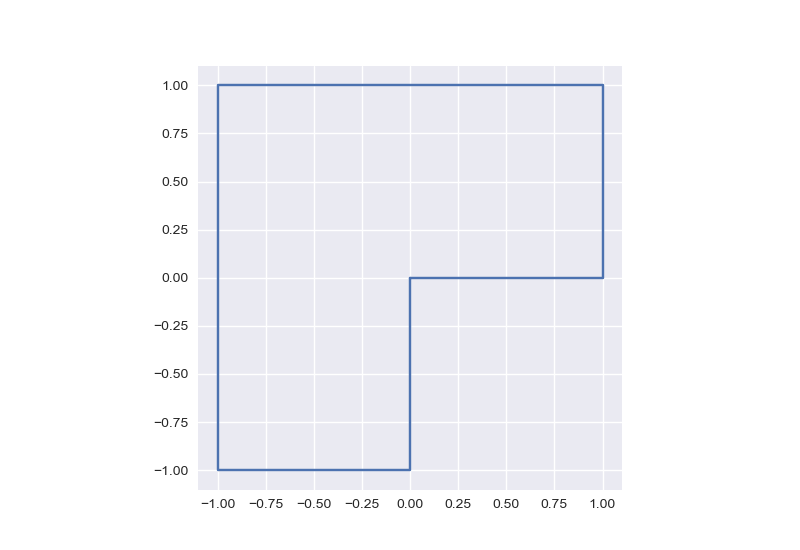

In [4]:
# polygon
x_v, y_v = [0,1,1,-1,-1,0], [0,0,1,1,-1,-1]
plot_polygon(x_v,y_v)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

Now, we place 50 evenly-spaced points along each of the four sides which are not adjacent to the reentrant corner:

<IPython.core.display.Javascript object>


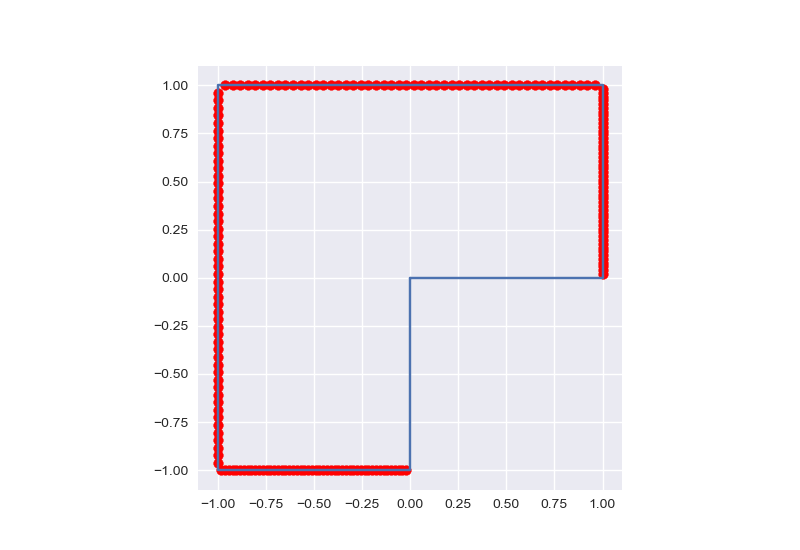

In [41]:
m_b = 4*50
x_b, y_b = boundary_points(x_v,y_v,round(m_b/4),skip=[0,-1])
fig = plt.figure()
ax = plt.gca()
plot_polygon(x_v,y_v,ax=ax)
ax.scatter(x_b,y_b,c='r')
ax.set_aspect('equal')
plt.show()

Finally, we add 50 points randomly placed within the interior:

<IPython.core.display.Javascript object>


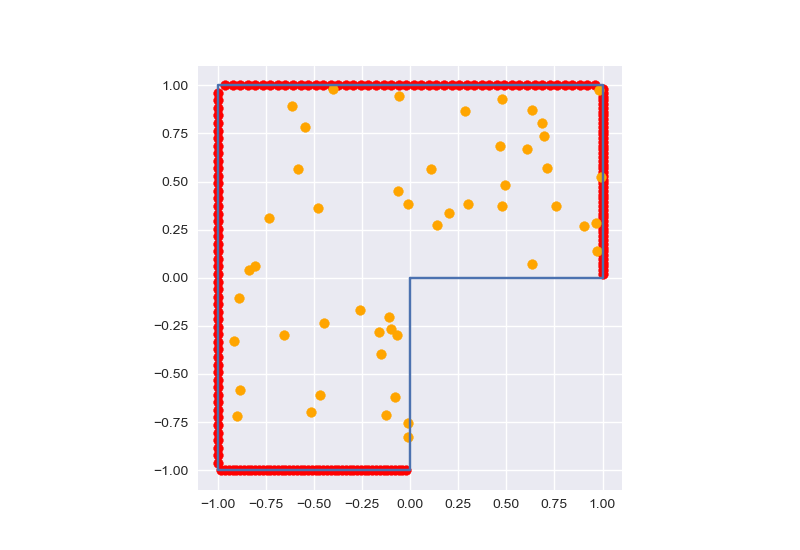

In [42]:
m_i = 50
x_i, y_i = interior_points(x_v,y_v,m_i)
fig = plt.figure()
ax = plt.gca()
plot_polygon(x_v,y_v,ax=ax)
ax.scatter(x_b,y_b,c='r')
ax.scatter(x_i,y_i,c='orange')
ax.set_aspect('equal')
plt.show()

We now construct the matrix function $A(\lambda)$, in which we will use an expansion of 15 Fourier-Bessel functions centered around the reentrant corner.

In [107]:
# terms in expansion around each corner
k = [15,0,0,0,0,0]
A_lam = build_A_lam(x_v,y_v,x_b,y_b,x_i,y_i,k)

<IPython.core.display.Javascript object>


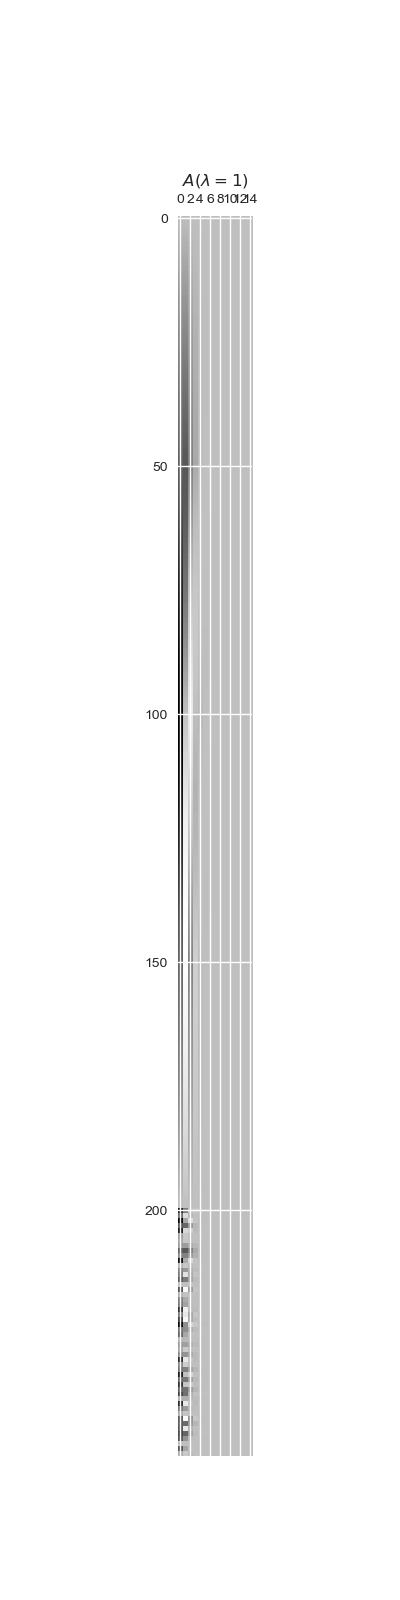

(250, 15)


In [44]:
# look at A for a value of λ
plt.matshow(A_lam(1))
plt.title("$A(\lambda=1)$")
plt.show()
print(A_lam(1).shape)

To find the eigenvalues, we need to find when $A(\lambda)c$, for some vector $c$, is zero on the boundary, and non-zero in the interior. This is equivalent to finding when the smallest singular value of $Q_B(\lambda)$ is zero, where $Q_B(\lambda)$ is the submatrix of a QR factorization of $A(\lambda)$ corresponding to the boundary points. Define $\sigma(\lambda) = \sigma_{\text{min}}\left( Q_b(\lambda)\right)$. Here we plot $\sigma(\lambda)$ over the interval $[0,20].$

<IPython.core.display.Javascript object>


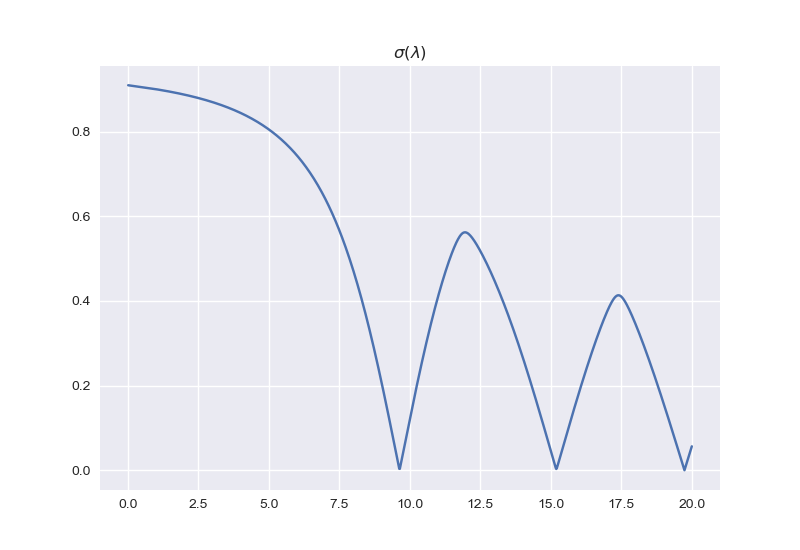

In [45]:
s = []
n = 1000
Lambda = np.linspace(0,20,n)[1:]
for lambda_ in Lambda:
    s.append(sigma(lambda_,A_lam,m_b))
    
fig = plt.figure()
plt.plot(Lambda,s)
plt.title("$\sigma(\lambda)$")
plt.show()

Now, to locate the eigenvalues, we need to use optimization to recover the minima of $\sigma(\lambda)$ which are sufficiently near zero. We use a black-box optimizer. Note, we are "cheating" a bit by telling the optimizer to look in intervals that our evaluations of $\sigma(\lambda)$ indicate contain minima. (This will pose a challenge to "automatic" eigenvalue approximation).

In [70]:
res1 = minimize_scalar(sigma,args=(A_lam,m_b),method='Bounded',bounds=(7.5,12.5),tol=1e-8)
res2 = minimize_scalar(sigma,args=(A_lam,m_b),method='Bounded',bounds=(12.5,17.5),tol=1e-8)
res3 = minimize_scalar(sigma,args=(A_lam,m_b),method='Bounded',bounds=(17.5,20),tol=1e-8)

In [71]:
res1

     fun: 0.0010648058251620757
 message: 'Solution found.'
    nfev: 15
     nit: 15
  status: 0
 success: True
       x: 9.639716510424147

In [72]:
res2

     fun: 0.003076581833186435
 message: 'Solution found.'
    nfev: 15
     nit: 15
  status: 0
 success: True
       x: 15.19719818709152

In [73]:
res3

     fun: 3.010431947031027e-05
 message: 'Solution found.'
    nfev: 19
     nit: 19
  status: 0
 success: True
       x: 19.739209089648647

From Trefethen and Betcke, the first eigenvalue is approximately $9.6397238440219$.

# Example 2: Random Polygon

<IPython.core.display.Javascript object>


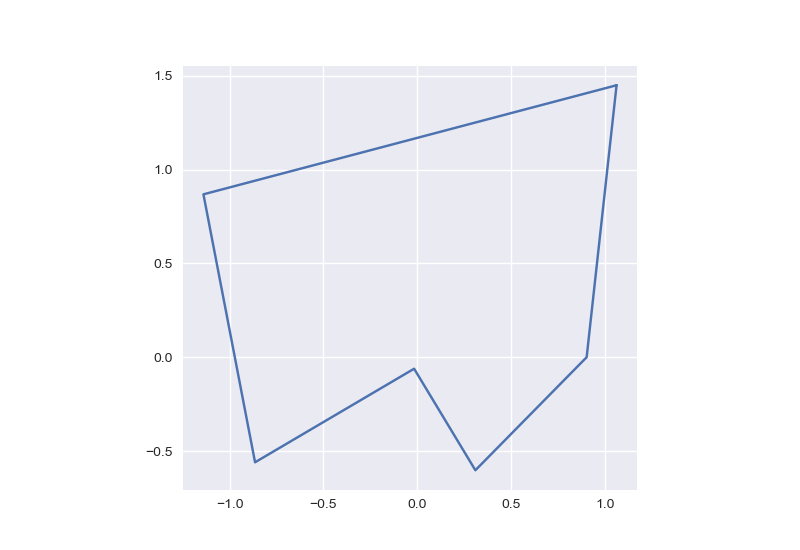

In [112]:
np.random.seed(2023)
x_v, y_v = random_polygon(6,1,.5,.3)
plot_polygon(x_v,y_v)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

<IPython.core.display.Javascript object>


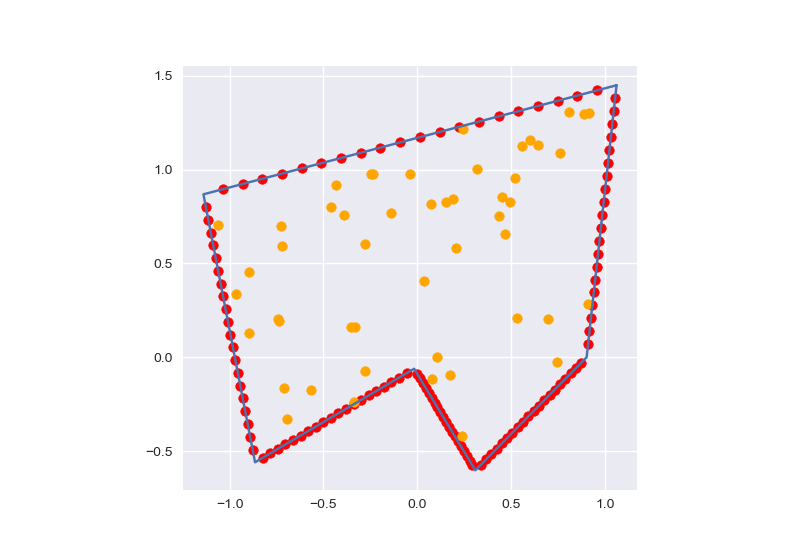

In [114]:
x_b, y_b = boundary_points(x_v,y_v,20)
m_b = len(x_b)
x_i, y_i = interior_points(x_v,y_v,50)
fig = plt.figure()
ax = plt.gca()
plot_polygon(x_v,y_v,ax=ax)
ax.scatter(x_b,y_b,c='r')
ax.scatter(x_i,y_i,c='orange')
ax.set_aspect('equal')
plt.show()

In [115]:
# expanding to order 20 around each vertex (total of 120 basis functions)
A_lam = build_A_lam(x_v,y_v,x_b,y_b,x_i,y_i,k=20)

In [116]:
s = []
n = 1000
Lambda = np.linspace(0,100,n)[1:]
for lambda_ in Lambda:
    s.append(sigma(lambda_,A_lam,m_b))

<IPython.core.display.Javascript object>


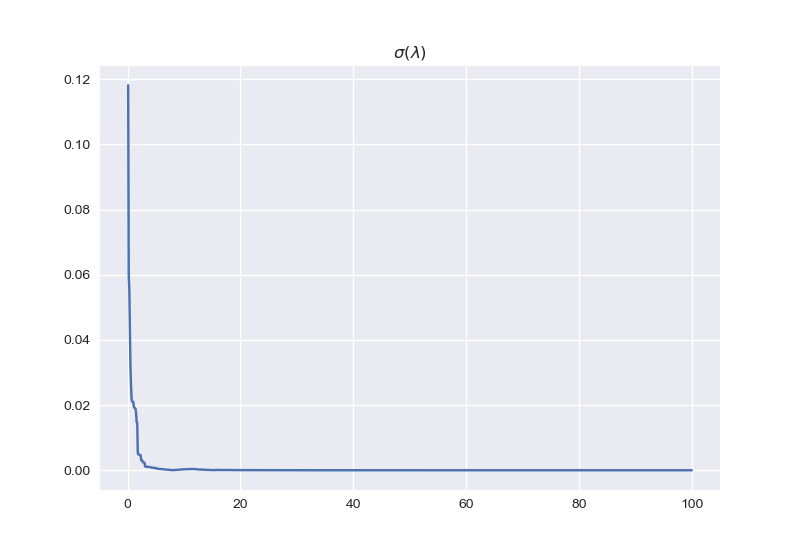

In [117]:
fig = plt.figure()
plt.plot(Lambda,s)
plt.title("$\sigma(\lambda)$")
plt.show()

# ¯\\_(ツ)_/¯